In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
hotels_data = pd.read_csv('/content/hotels_in_nepali_city.csv')

In [ ]:
hotels_data

,city,name,address,latitude,longitude,rating,total_ratings,place_id,phone_number
0,Kathmandu,Nepal Pavilion Inn,"Amrit Marg, Thamel Post Box 6062, Kathmandu 44...",27.711529,85.312063,4.2,209,ChIJeUwGJHIZ6zkReIMr3o1MB_M,01-5320383
1,Kathmandu,Hotel Shanker Kathmandu,"Kathmandu 44600, Nepal",27.718895,85.319468,4.3,2904,ChIJw3uqaBsZ6zkRjS-DDyXqWyk,01-4510151
2,Kathmandu,Hotel Nepalaya,"Maitripura Mahavihara, Thamel Marg, Kathmandu ...",27.711982,85.311349,4.4,1093,ChIJIS1HLPwY6zkRfpeS9we8v-k,01-5369141
3,Kathmandu,Royal Empire Boutique Hotel,"Kathmandu 44600, Nepal",27.722913,85.328600,4.2,656,ChIJ0SM5UhEZ6zkRjWY16XUeu2E,01-4000542
4,Kathmandu,Ramada Encore by Wyndham Kathmandu Thamel,"P885+GFG, Z Street 1, Kathmandu 44600, Nepal",27.716730,85.309217,4.4,644,ChIJn8E2t5AZ6zkRMn-jYUOMKbY,01-4700404
...,...,...,...,...,...,...,...,...,...
597,Bharatpur,Hotel Everest Inn Chitwan,"CMS ROAD, Bharatpur Opposite of CMS Hospital, ...",27.684554,84.435130,2.9,30,ChIJWXvoxKP7lDkRl5ixxl0F4f0,985-5067464
598,Bharatpur,Hotel Image Palace,"Bharatpur 44200, Nepal",27.703148,84.431410,3.8,95,ChIJV-vAwE77lDkRA3dtgUYPuKo,056-530731
599,Bharatpur,Hotel Garden of Dreams,"Ratnanagar 44200, Nepal",27.577139,84.504164,4.7,26,ChIJ9RxXid7ulDkR7TmBDzWakrU,984-5049155
600,Bharatpur,Into The Wild Eco Resort - bharatpur 22 Patihani,"Bharatpur 44200, Nepal",27.569688,84.360463,4.7,60,ChIJ6x2PVyHxlDkRbALhwzMY2ts,984-1230163


In [ ]:
# Selecting the relevant features: 'latitude', 'longitude', and 'rating'
features = hotels_data[['latitude', 'longitude', 'rating']]

In [ ]:
# Normalizing the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    # Earth radius in kilometers
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [ ]:
def get_similar_hotels(hotel_name, num_recommendations=5):
    if hotel_name not in hotels_data['name'].values:
        return "Hotel name not found."

    # Get the index of the hotel from the dataset
    idx = hotels_data.index[hotels_data['name'] == hotel_name].tolist()[0]

    # Get the latitude, longitude, and rating of the selected hotel
    hotel_lat, hotel_lon, hotel_rating = features_scaled[idx]

    # Calculate the distances and similarities
    distances = []
    for lat, lon, rating in features_scaled:
        geo_distance = haversine(hotel_lat, hotel_lon, lat, lon)
        rating_distance = np.abs(hotel_rating - rating)
        total_distance = geo_distance + (rating_distance * 100)
        distances.append(total_distance)

    # Get the indices of hotels with the smallest distances
    hotel_indices = np.argsort(distances)[1:num_recommendations + 1]

    # Return the names and basic info of the recommended hotels
    return hotels_data.iloc[hotel_indices][['name', 'address', 'rating']]

In [ ]:
# Example usage:
gg = pd.DataFrame(get_similar_hotels('Hotel Nepalaya', 5))
gg

,name,address,rating
44,Dom Himalaya Hotel,"Paknajol Marg, Kathmandu 44600, Nepal",4.4
16,Taleju Boutique Hotel,"Jyatha Marg, Kathmandu 44600, Nepal",4.4
38,Maya Manor Boutique Hotel,"Hattisar Sadak, Kathmandu 44600, Nepal",4.4
4,Ramada Encore by Wyndham Kathmandu Thamel,"P885+GFG, Z Street 1, Kathmandu 44600, Nepal",4.4
42,Alpine Hotel & Apartment,"Chaksibari Marg, Opp Manang Hotel, Kathmandu 4...",4.4


from matplotlib import pyplot as plt
import seaborn as sns
gg.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
gg.groupby('address').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gg.sort_values('rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gg.sort_values('rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('address')):
  _plot_series(series, series_name, i)
  fig.legend(title='address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['address'].value_counts()
    for x_label, grp in gg.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('address')

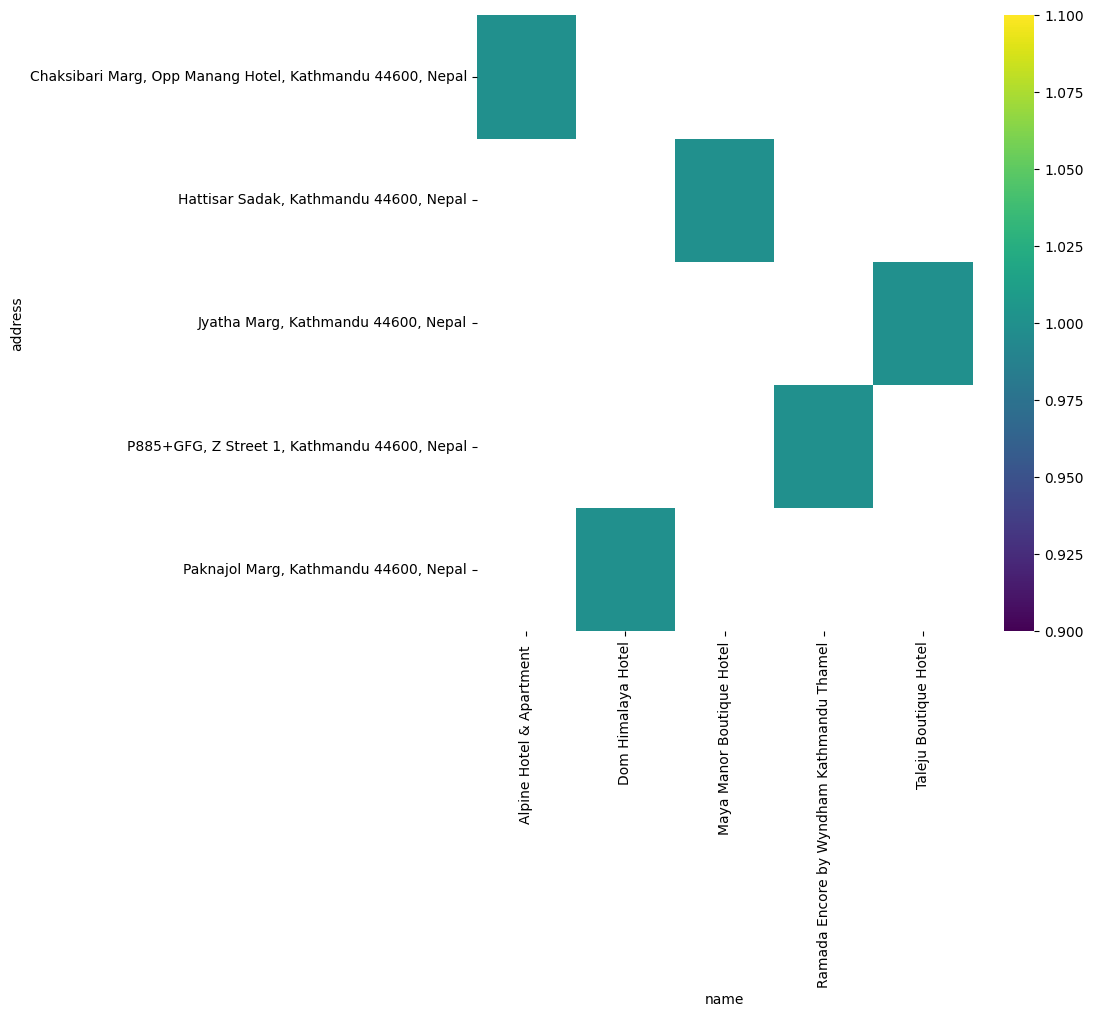

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['address'].value_counts()
    for x_label, grp in gg.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('address')

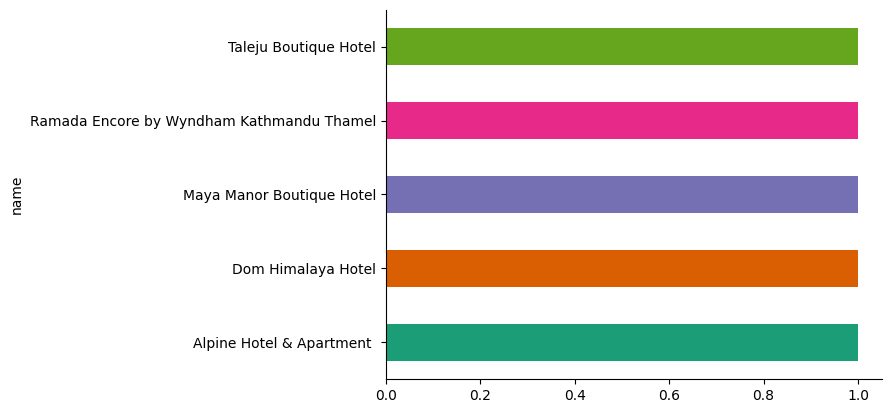

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
gg.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)